# Cardio Good Fitness Project (reviewed by: Douglas Call)

I.	Develop a Plan for exploring the Cardio Good Fitness project, to put a method in place to decide what are the most relevant elements of the Cardio Good Fitness Product provided Datasets. 

II.	Find out from the Datasets what Fitness Products were receiving the most Usage (was using this as a method of equating which products were most successful). Since the objective of the Fitness Products was to provide fitness to the Customers, wanted to determine which Products were offering the most fitness benefit to the Customer (by evaluating Customer Fitness levels, and Miles traveled during the various workout, since these appeared to be the strong indicators of Fitness program success).

III.	The last part of the puzzle was to determine which set of Customers were benefitting the most from the various Fitness Products being offered, taking into factors like Gender & Age range when applicable.

NOTE: Noticed that there were no columns providing dates/timestamps as to when the customers signed up for the various Fitness Programs. This can present challenges for the Data Scientist to give time context applicable Recommendations about the various Fitness programs. There is no way to see if any of the existing Fitness programs are trending up/down in Terms of how much usage they're receiving in this year relative to previous years. Aslo apparently you're not interested in optimizing the mix of Fitness Programs to maximize your revenue, because there also isn't any pricing information. So keeping this in mind the recommendations made are based on the best guess for which programs truly are the best performing now.

In [1]:
# Loaded my standard set of Python libraries

In [2]:
import io
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interactive 
from datetime import datetime
import pytz

In [3]:
from platform import python_version
python_version()

'3.9.7'

In [4]:
# Verify that the required Dataset is availble in CWD

In [5]:
# my_dir = []

cwd = os.getcwd()
print('Current Working Directory:',cwd,'\n')

for x in os.listdir():
    if x.startswith('Cardio') and x.endswith('.csv'):
        print(x)

#    if x.startswith('NS2') and x.endswith('.csv'):
# Only Prints csv files present in the cwd      
#         if x.endswith('.csv'):
#             my_dir.append(x)

Current Working Directory: C:\Users\Administrator\Great_Learning 

CardioGoodFitness.csv


## Read in Cardio Dataset

In [6]:
cardio = pd.read_csv('CardioGoodFitness.csv')

In [7]:
## View cardio data frame basic info

In [8]:
# print('1) head\n',cardio.head(),'\n')
print('1) shape rows/columns\n',cardio.shape,'\n')

cardio.describe(include="all")

1) shape rows/columns
 (180, 9) 



,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [9]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [59]:
# no non-null vallues so no further processing required

In [11]:
## get exact cardio column names and data types

In [12]:
print(type(cardio),'\n')
print(cardio.columns,'\n')
cardio.dtypes

<class 'pandas.core.frame.DataFrame'> 

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object') 



Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [13]:
cardio

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [14]:
## get overall view of selected numerical elements present in cardio dataset
## wanted to view the various numberical relationships specifically in terms of Fitness Products

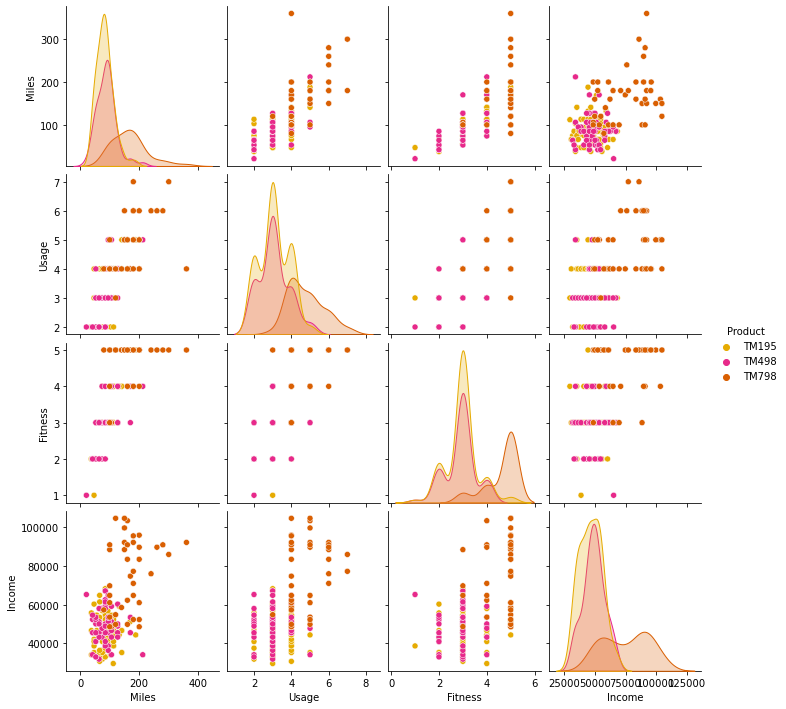

In [15]:
# kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’}

sns.pairplot(data=cardio, vars=['Miles', 'Usage','Fitness','Income'], hue='Product',   palette='Dark2_r');

In [16]:
## view what relationship Fitness Product usage and miles were like in realtion to gender

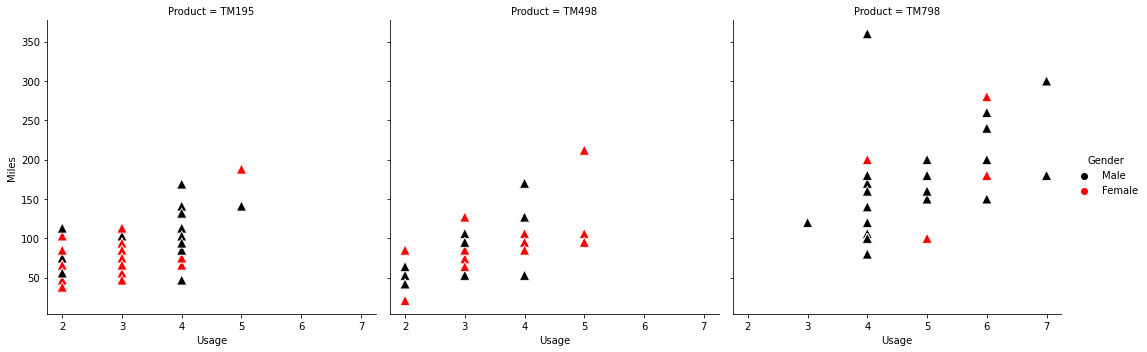

In [17]:
sns.relplot(x='Usage', y='Miles',
            data=cardio[cardio.Usage > 1],
            hue='Gender',
            s=100,
            palette=['black','red'],
            marker='^',
            col='Product');

In [18]:
# view column data types sorted by the data types for quick reference

dfc = pd.DataFrame(cardio.dtypes, columns = ['Data Types'])
dfc.index.names = ['Features']
dfc.sort_values(['Data Types','Features'], inplace = True)
dfc
# cardio.dtypes.sort_index()

,Data Types
Features,
Age,int64
Education,int64
Fitness,int64
Income,int64
Miles,int64
Usage,int64
Gender,object
MaritalStatus,object
Product,object


In [19]:
## determine if there is any real significance with reference to Marital Status and Age to Product Preference

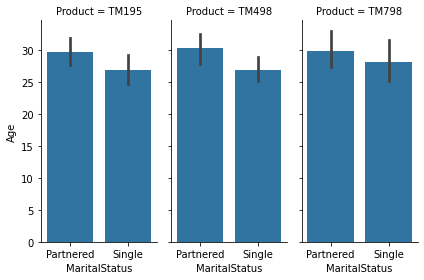

In [20]:
g = sns.FacetGrid(cardio, col='Product', height=4, aspect=.5)
g.map(sns.barplot, 'MaritalStatus', 'Age', order=['Partnered','Single']);

In [21]:
## usage of the various fitness products based on gender

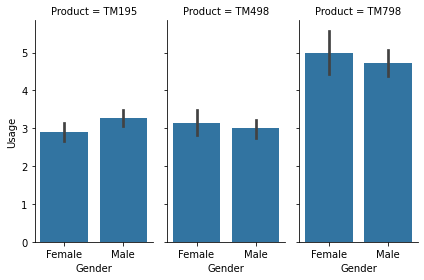

In [22]:
g = sns.FacetGrid(cardio, col='Product', height=4, aspect=.5)
g.map(sns.barplot, 'Gender', 'Usage', order=['Female','Male']);

In [23]:
cardio.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object', name='Features')

In [24]:
# determine if there is any real significance between Income and Usage or Income and Fitness

In [25]:
print(cardio['Income'].max())
print(cardio['Income'].min())
print(cardio['Income'].max()-cardio['Income'].min())
print('Income Increment Level: ',75019/7)

104581
29562
75019
Income Increment Level:  10717.0


In [26]:
# using pd.cut() function to create bins
cardio['Income_bins'] = pd.cut(cardio['Income'],bins=[29562,40279,50996,61713,72430,83147,93864,104581],labels=['29.5-40.3','40.3-51','51-61.7','61.7-72.4','72.4-83.1','83.1-93.9','93.9-104+'], right=False)

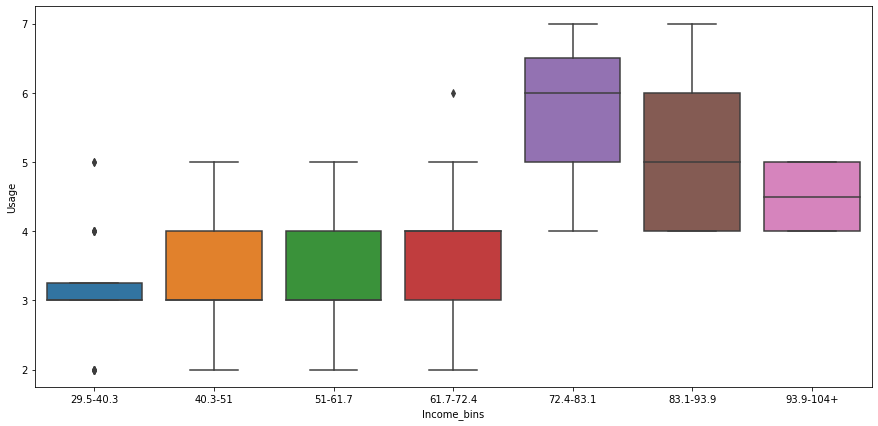

In [27]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio,x='Income_bins',y='Usage',showfliers=True) # showfliers parameter controls the representation of outliers in the boxplot
plt.show()

In [28]:
# There does appear to be a stronger level of usage among people with incomes above $72,400.

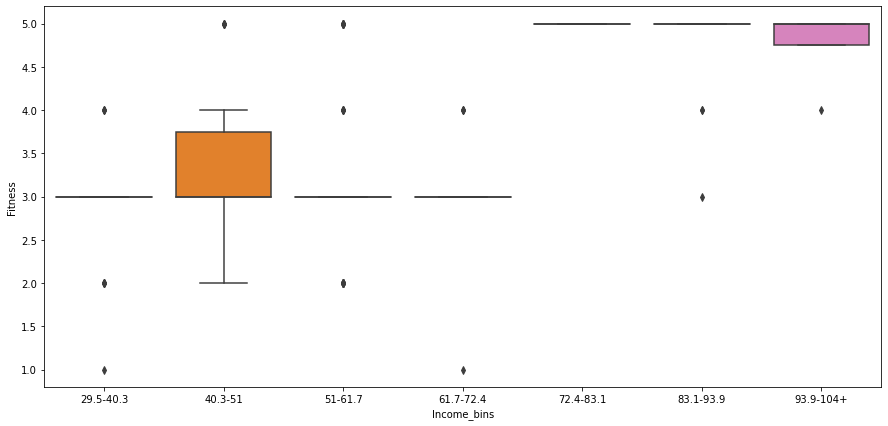

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cardio,x='Income_bins',y='Fitness',showfliers=True) # showfliers parameter controls the representation of outliers in the boxplot
plt.show()

In [30]:
# There doesn't appear to be a strong association between income levels and Fitness as indicated above.

In [31]:
# Now to look at Income Levels vs Fitness and different Product Offerings

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


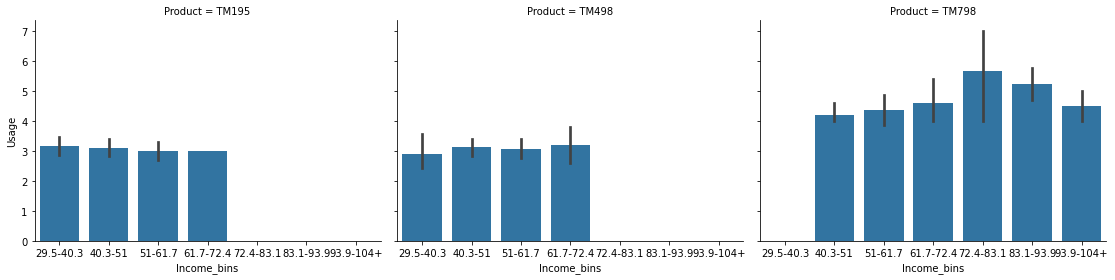

In [32]:
g = sns.FacetGrid(cardio, col='Product', height=4, aspect=1.3)
g.map(sns.barplot, 'Income_bins', 'Usage'); #, order=['Female','Male']);

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


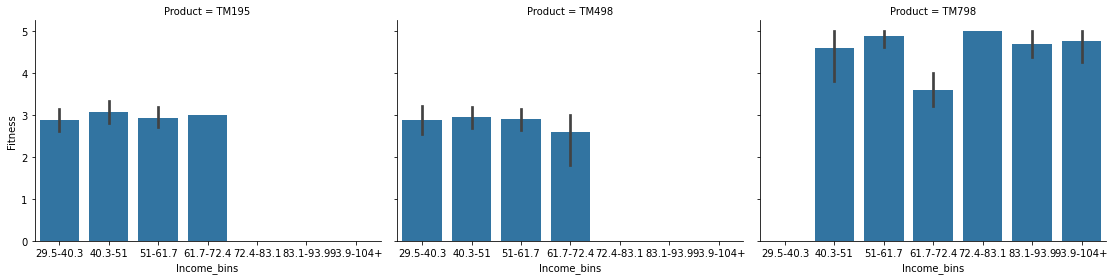

In [33]:
g = sns.FacetGrid(cardio, col='Product', height=4, aspect=1.3)
g.map(sns.barplot, 'Income_bins', 'Fitness'); #, order=['Female','Male']);

In [34]:
# there definitely is a strong association with Fitness Product TM798 for people with higher income levels

In [35]:
# wanted to view the correlation of the various columns in an unrestricted heatmap

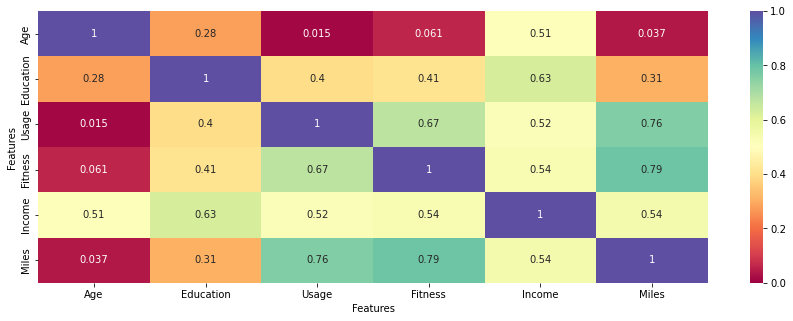

In [36]:
plt.figure(figsize=(15, 5))
sns.heatmap(cardio.corr(), vmin=0, vmax=1, annot=True, cmap='Spectral');

In [37]:
## what variables had the highest correlation when considering cardio.corr() for Usage and Usage > 0.6

In [38]:
cardio.corr()[abs(cardio.corr()['Usage'])>0.6]

Features,Age,Education,Usage,Fitness,Income,Miles
Features,,,,,,
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [39]:
## this confirmed that Usage, Fitness and Miles were the major players for evaluation

In [40]:
## wanted to graph a quick heatmap plot of this relationship

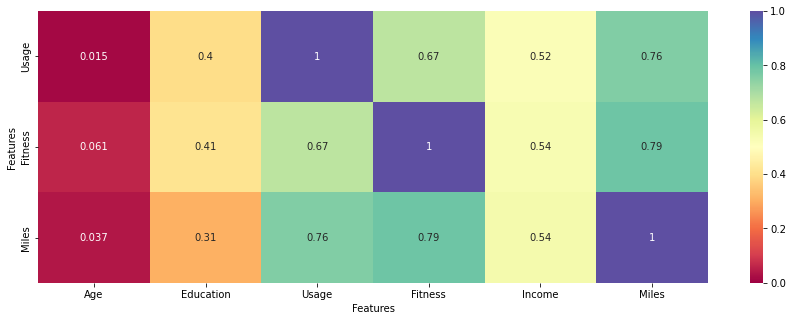

In [60]:
plt.figure(figsize=(15, 5))
sns.heatmap(cardio.corr()[abs(cardio.corr()['Usage'])>0.6], vmin=0, vmax=1, annot=True, cmap='Spectral');

In [42]:
## quick look at most popular fitness products based on their usage

In [43]:
top_usage = cardio.groupby('Product').sum()[['Usage']].sort_values('Usage', ascending=False)
top_usage

Features,Usage
Product,
TM195,247
TM798,191
TM498,184


In [44]:
## quick look at most popular fitness products based on their miles

In [45]:
top_usage = cardio.groupby('Product').sum()[['Miles']].sort_values('Miles', ascending=False)
top_usage

Features,Miles
Product,
TM798,6676
TM195,6623
TM498,5276


In [46]:
top_usage = cardio.groupby('Product').sum()[['Fitness']].sort_values('Fitness', ascending=False)
top_usage

Features,Fitness
Product,
TM195,237
TM798,185
TM498,174


In [47]:
cardio.groupby(['Product', 'Gender']).agg({'Usage':'sum', 'Fitness':'sum', 'Miles':'sum'}).unstack()

Features  Usage      Fitness       Miles      
Gender   Female Male  Female Male Female  Male
Product                                       
TM195       116  131     115  122   3048  3575
TM498        91   93      83   91   2533  2743
TM798        35  156      32  153   1260  5416

In [48]:
## quick check to make sure that males were most interested in using product TM798
## the other products were used pretty much similarly by both genders

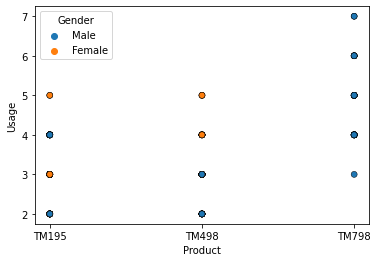

In [49]:
sns.scatterplot(data=cardio, y='Usage', x='Product',
                hue='Gender',
                # style='Product', s=60, alpha=1.0,
                edgecolor='black');
# plt.legend(loc='center');

In [50]:
cardio.corr()[ (abs(cardio.corr()['Usage'])>0.7) | (abs(cardio.corr()['Fitness'])>0.7)] # selecting abs(corr()) greater than 0.7

Features,Age,Education,Usage,Fitness,Income,Miles
Features,,,,,,
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [51]:
## strong correlation of the primary elements being ever further corroborated with cardio.corr() above 0.7 for usage & fitness

<AxesSubplot:xlabel='Features', ylabel='Features'>

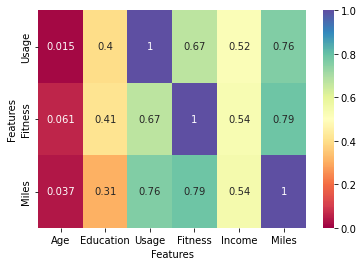

In [52]:
cardio_c1 = cardio.corr()[ (abs(cardio.corr()['Usage'])>0.7) | (abs(cardio.corr()['Fitness'])>0.7)] # selecting abs(corr()) greater than 0.7
sns.heatmap(cardio_c1, vmin=0, vmax=1, annot=True, cmap='Spectral')

In [53]:
## verified that elements like age, education, income really didn't have strong correlation with fitness or usage

In [54]:
cardio.corr().T

Features,Age,Education,Usage,Fitness,Income,Miles
Features,,,,,,
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


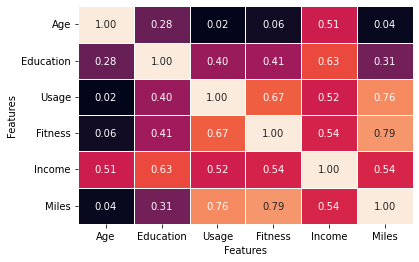

In [55]:
sns.heatmap(data=cardio.corr().T, linewidth=1, annot=True, cbar=False, fmt='.2f');

In [56]:
## finally compiled the key collection of data based on analysis of all prior plots and groupby
## so can now provide my recommendations

##  usage, fitness, miles and age

In [57]:
cardio.groupby(['Product', 'Gender']).agg({'Usage':['sum','mean'], 'Fitness':['sum','mean'], 'Miles':['sum','mean'], 'Age':'median'}).unstack()

Features  Usage                          Fitness                           \
            sum           mean               sum           mean             
Gender   Female Male    Female      Male  Female Male    Female      Male   
Product                                                                     
TM195       116  131  2.900000  3.275000     115  122  2.875000  3.050000   
TM498        91   93  3.137931  3.000000      83   91  2.862069  2.935484   
TM798        35  156  5.000000  4.727273      32  153  4.571429  4.636364   

Features  Miles                                  Age        
            sum              mean             median        
Gender   Female  Male      Female        Male Female  Male  
Product                                                     
TM195      3048  3575   76.200000   89.375000   26.5  26.0  
TM498      2533  2743   87.344828   88.483871   29.0  25.0  
TM798      1260  5416  180.000000  164.121212   26.0  27.0

In [58]:
cardio.groupby(['Product', 'Gender']).agg({'Usage':['sum','mean'], 'Fitness':['sum','mean'], 'Miles':['sum','mean'], 'Age':'median'}).unstack().round(2)

Features  Usage                   Fitness                    Miles        \
            sum        mean           sum        mean          sum         
Gender   Female Male Female  Male  Female Male Female  Male Female  Male   
Product                                                                    
TM195       116  131   2.90  3.28     115  122   2.88  3.05   3048  3575   
TM498        91   93   3.14  3.00      83   91   2.86  2.94   2533  2743   
TM798        35  156   5.00  4.73      32  153   4.57  4.64   1260  5416   

Features                    Age        
            mean         median        
Gender    Female    Male Female  Male  
Product                                
TM195      76.20   89.38   26.5  26.0  
TM498      87.34   88.48   29.0  25.0  
TM798     180.00  164.12   26.0  27.0

#
After reviewing the previous graphs and the groupby results, was able to make
recommendations about each of the Cardio Good Fitness Products that are being offered.

Cardio Good Fitness Project
Recommendations:

1) The TM195 Product
This product had the most usage*, was responsible for providing the most fitness and it was close to having the most miles accumulated by customers using this product. The last feature of importance is this product was theStrongest in Usage, Fitness & Miles of all categories overall.

Recommendation: The TM195 is a real winner, and you should keep using and improving the product it's a real good one!

* Product  Usage	
  TM195	= 247  
  TM798	= 191  
  TM498	= 184  
  
2) The TM798 Product
This product has the most Miles* accumulated by the Customers, was middle of the ground for Usage & Fitness overall, however this product was really enjoyed by Males in terms of Usage, Fitness and Miles. So this is an excellent product especially for Males. People who enjoyed this product had significantly higher income levels than the other fitness Products

Recommendation: See if there is a way to make this product more popular with Females, but a good product!

* Product Miles  
  TM798	= 6676    
  TM195	= 6623    
  TM498	= 5276    
  
3) The TM498 Product
This product is basically the least performing Fitness in fitness and miles but fairly good for females. However nothing really stands out as being particularly great about this product.

In fact, its the lowest ranking fitness product overall by Usage, Miles & Fitness. It doesn't really seem to be any more attractive to Females than it is to Males.

Recommendation: If you were thinking of a poor performing product and redesigning it/or creating a new product, this might be where you’d start. Another thing you might consider is to see if there is a way to modify the TM195 so that you could push many of the customers from TM498 into that superior TM195 product.

* Product	Fitness  
  TM195	= 237  
  TM798	= 185  
  TM498	= 174  